In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import geopandas as gpd

In [154]:
#merged with codes

In [155]:
sk_province = gpd.read_file('skorea-provinces-2018-geo.json') # Seoul, or do
sk_muni = gpd.read_file('skorea-municipalities-2018-geo.json') # gu
sk_submuni = gpd.read_file('skorea-submunicipalities-2018-geo.json') #dong
seoul_data = pd.read_csv('Seoul_Data.csv')

In [201]:
neighborhoods = pd.read_csv('Neighborhood Level Data Ver 2.csv')

In [157]:
sk_submuni.head()

,name,base_year,name_eng,code,geometry
0,사직동,2018,Sajik-dong,1101053,"MULTIPOLYGON (((126.96894 37.57815, 126.96965 ..."
1,삼청동,2018,Samcheong-dong,1101054,"MULTIPOLYGON (((126.97714 37.59768, 126.97874 ..."
2,부암동,2018,Buam-dong,1101055,"MULTIPOLYGON (((126.96173 37.60714, 126.96267 ..."
3,평창동,2018,Pyeongchang-dong,1101056,"MULTIPOLYGON (((126.96267 37.60567, 126.96173 ..."
4,무악동,2018,Muak-dong,1101057,"MULTIPOLYGON (((126.95975 37.58001, 126.96111 ..."


In [158]:
neighborhoods.columns #52 rows - 3 rows (aggregation) = 49 neighborhood names

Index(['District Name', 'Neighborhood Name', '2016 Number of Coffee Shops',
       '2019 Number of Coffee Shops',
       'Percent Change in Number of Coffee Shops 2016-2019',
       '2018 Aging Index Percentage', '2015 Total Number of Stores',
       '2015 Franchise Stores', '2015 General Stores',
       '16 Total Number of Stores', '16 Franchise Stores', '16 General Stores',
       '17 Total Number of Stores', '17 Franchise Stores', '17 General Stores',
       'Q2-18 Total Number of Stores', 'Q2-18 Franchise Stores',
       'Q2-18 General Stores', 'Q2-19 Total Number of Stores',
       'Q2-19 Franchise Stores', 'Q2-19 General Stores',
       '% Change in Total Number of Storesg',
       '% Change in Total Number Franchise Stores',
       '% Change in Residential Pop (2015-2019)',
       '% Change in Work Population (2015-2019)',
       'Q2-15 Residential Population (persons per square mile)',
       'Q2-15 Work Population (persons per square mile)',
       'Q2-16 Residential Populatio

In [159]:
neighborhoods = neighborhoods.rename(columns = {'Neighborhood Name':'name_eng'})

## 1. join the level 2 neighborhoods (dong) data with the geospatial data (dong)


In [160]:
merged = pd.merge(neighborhoods, sk_submuni, how = 'inner', on = 'name_eng') # want inner join

merged = merged[merged['code'].str.startswith('11')] # we only want the provinces that start with 11, b/c that is Seoul's code

In [161]:
len(merged) # we know that it's a perfect match between the two

49

## 2. merge the dong data (submuni) into the gu data (Districts)

In [162]:
merged.head()

,District Name,name_eng,2016 Number of Coffee Shops,2019 Number of Coffee Shops,Percent Change in Number of Coffee Shops 2016-2019,2018 Aging Index Percentage,2015 Total Number of Stores,2015 Franchise Stores,2015 General Stores,16 Total Number of Stores,...,Q2-19 Business Openings x,Q2-19 Business Closing x,Q2-19 Opening Rate (Percent) w,Q2-19 Closing Rate (Percent) z,Q2-15 Number of Households x,Q2-19 Number of Households b,name,base_year,code,geometry
0,Seongdong-gu,Wangsimni2-dong,9.0,14.0,0.555556,117.53,577,29,548,604,...,24,17,4.3,3.0,"5,579","7,779",왕십리2동,2018,1104052,"MULTIPOLYGON (((127.03322 37.56194, 127.03107 ..."
1,Seongdong-gu,Wangsimnidoseondong,31.0,47.0,0.516129,104.86,"1,240",83,"1,157","1,285",...,58,53,3.8,3.5,"5,426","11,321",왕십리도선동,2018,1104071,"MULTIPOLYGON (((127.02521 37.57085, 127.02616 ..."
2,Seongdong-gu,Majang-dong,17.0,18.0,0.058824,156.00,"2,297",48,"2,249","2,327",...,21,39,1.0,1.8,"10,142","10,623",마장동,2018,1104054,"MULTIPOLYGON (((127.03777 37.57227, 127.03813 ..."
3,Seongdong-gu,Sageun-dong,59.0,64.0,0.084746,182.50,800,129,671,828,...,26,31,3.2,3.9,"5,925","7,174",사근동,2018,1104055,"MULTIPOLYGON (((127.04823 37.56538, 127.04836 ..."
4,Seongdong-gu,Haengdang 1(il)-dong,30.0,32.0,0.066667,139.87,"1,080",119,961,"1,098",...,24,30,2.2,2.7,"6,778","7,735",행당1동,2018,1104056,"MULTIPOLYGON (((127.03864 37.56305, 127.03881 ..."


# First, we need to convert merged back into a geodata frame to be able to spatially join it with the districts shape geodata frame

In [163]:
g_merged = gpd.GeoDataFrame(merged, geometry='geometry') 
# neighbohoods csv merged with submuni data, turned into a geodataframe

In [164]:
copy = g_merged
copy.crs = 'epsg:4326'

In [165]:
copy;

In [166]:
sk_muni.columns

Index(['name', 'base_year', 'name_eng', 'code', 'geometry'], dtype='object')

In [167]:
seoul = gpd.GeoDataFrame(sk_muni[sk_muni['code'].str.startswith('11')], geometry='geometry') 
# again, we only want the municipalities in Seoul
seoul.crs = 'epsg:4326'

In [168]:
seoul_n = gpd.sjoin(seoul, copy, how = 'left', op = 'contains')

In [169]:
seoul_n.columns;

In [170]:
seoul_n['% Change in Residential Pop (2015-2019)']; # confirming this is here, and there's only one (from neighborhoods)

In [171]:
seoul_n;

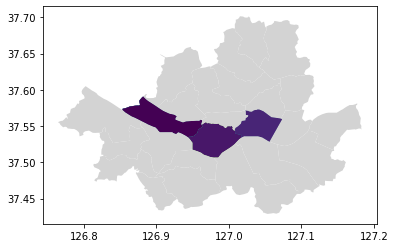

In [172]:
seoul_n.plot(column = '% Change in Residential Pop (2015-2019)', missing_kwds={'color': 'lightgrey'})


In [173]:
sk_muni.columns

Index(['name', 'base_year', 'name_eng', 'code', 'geometry'], dtype='object')

In [174]:
sk_muni[sk_muni['name_eng']=='Mapo-gu'] 
sk_muni[sk_muni['name_eng']=='Yongsan-gu'] 
sk_muni[sk_muni['name_eng']=='Seongdong-gu'] 

,name,base_year,name_eng,code,geometry
3,성동구,2018,Seongdong-gu,11040,"MULTIPOLYGON (((127.04324 37.57241, 127.04491 ..."


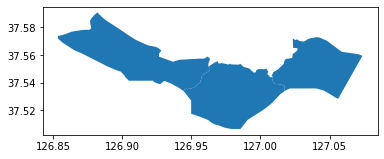

In [175]:
# these are the focused districts. wrong name.
seoul_ = sk_muni[sk_muni['code'].str.startswith('11')].iloc[[2, 3, 13], :] 
#13 (Mapo), 2 (Yongsan-gu), 3 (Seongdong-gu)
seoul_.plot()

# Highlight the case study neighborhoods

In [176]:
g_merged['name_eng'].values
#'Itaewon 1(il)-dong', 'Itaewon 2(i)-dong'
# 'Seongsu1(il)-ga1(il)-dong', 'Seongsu1(il)-ga2(i)-dong', 'Seongsu 2(i)-ga1(il)-dong', 'Seongsu 2(i)-ga 3(sam)-dong'
#'Seogyo-dong'
# 'Yeonnam-dong'

array(['Wangsimni2-dong', 'Wangsimnidoseondong', 'Majang-dong',
       'Sageun-dong', 'Haengdang 1(il)-dong', 'Haengdang 2(i)-dong',
       'Eungbong-dong', 'Geumho1Gadong', 'Geumho2·3Gadong',
       'Geumho4Gadong', 'Oksu-dong', 'Seongsu1(il)-ga1(il)-dong',
       'Seongsu1(il)-ga2(i)-dong', 'Seongsu 2(i)-ga1(il)-dong',
       'Seongsu 2(i)-ga 3(sam)-dong', 'Songjeong-dong', 'Yongdap-dong',
       'Ahyeon-dong', 'Gongdeok-dong', 'Dohwa-dong', 'Yonggang-dong',
       'Daeheung-dong', 'Yeomni-dong', 'Sinsu-dong', 'Seogangdong',
       'Seogyo-dong', 'Hapjeong-dong', 'Mangwon 1(il)-dong',
       'Mangwon 2(i)-dong', 'Yeonnam-dong', 'Seongsan 1(il)-dong',
       'Seongsan 2(i)-dong', 'Sangam-dong', 'Huam-dong', 'Yongsan2Gadong',
       'Namyeong-dong', 'Cheongpadong', 'Wonhyoro1-dong',
       'Wonhyoro2-dong', 'Hyochang-dong', 'Yongmun-dong', 'Hangangnodong',
       'Ichon 1(il)-dong', 'Ichon 2(i)-dong', 'Itaewon 1(il)-dong',
       'Itaewon 2(i)-dong', 'Hannam-dong', 'Seobinggo-dong',
  

In [177]:
def find_indices(li):
    indices = []
    for i in li:
        index = np.where(g_merged["name_eng"] == i)[0][0]
        indices += [index]
    return indices

In [178]:
li = ['Itaewon 1(il)-dong', 'Itaewon 2(i)-dong', 'Seongsu1(il)-ga1(il)-dong', 'Seongsu1(il)-ga2(i)-dong', 'Seongsu 2(i)-ga1(il)-dong', 'Seongsu 2(i)-ga 3(sam)-dong', 'Seogyo-dong', 'Yeonnam-dong']

In [179]:
case_study_n = find_indices(li)

In [180]:
case_study_n # the indices

[44, 45, 11, 12, 13, 14, 25, 29]

In [181]:
case_study = g_merged.iloc[case_study_n]


In [182]:
outer_seoul = seoul_n.drop([2, 3, 13], axis = 0)

# Chloropleth Map 1: % Change in Residential Pop (2015-2019)

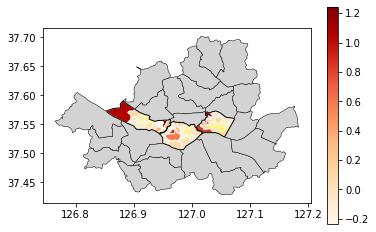

In [183]:
base = seoul_.geometry.boundary.plot(color = None, edgecolor='k',linewidth = 1)

outer_seoul.plot(ax = base, color = '#d3d3d3', edgecolor = 'black', linewidth=0.5)

g_merged.plot(ax=base, column = '% Change in Residential Pop (2015-2019)', legend = True, cmap='OrRd', edgecolor = 'white', linewidth=1)
case_study.plot(ax = base, facecolor="none", edgecolor = 'yellow', linewidth = 0.5)


# Chloropleth Map 2: % Change in Work Population (2015-2019)

(126.74353119797986, 127.204491931786, 37.41517625211965, 37.715087618080894)

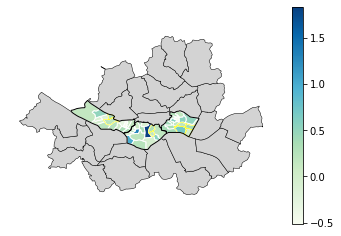

In [184]:
base = seoul_.geometry.boundary.plot(color = None, edgecolor='k',linewidth = 1)

outer_seoul.plot(ax = base, color = '#d3d3d3', edgecolor = 'black', linewidth=0.5)

g_merged.plot(ax = base, column = '% Change in Work Population (2015-2019)', legend = True, cmap='GnBu', edgecolor = 'white', linewidth=1)
case_study.plot(ax = base, facecolor="none", edgecolor = 'yellow', linewidth = 0.5)

plt.axis('off')

# "Zoomed" Chloropleth 1: % Change in Residential Pop (2015-2019)

(126.84262314641533,
 127.08474112160337,
 37.502306269921014,
 37.595006060200845)

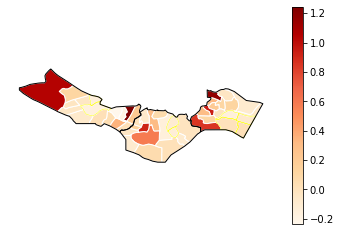

In [185]:
ax = g_merged.plot(column = '% Change in Residential Pop (2015-2019)', legend = True, cmap='OrRd', edgecolor = 'white', linewidth=1)
case_study.plot(ax = ax, facecolor="none", edgecolor = 'yellow', linewidth = 0.5)

seoul_.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe
plt.axis('off')

# "Zoomed" Chloropleth 2: % Change in Work Population (2015-2019)

(126.84262314641533,
 127.08474112160337,
 37.502306269921014,
 37.595006060200845)

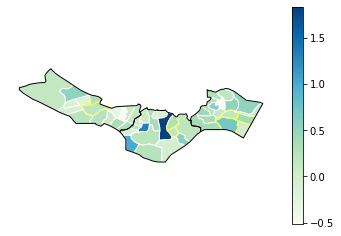

In [186]:
ax = g_merged.plot(column = '% Change in Work Population (2015-2019)', legend = True, cmap='GnBu', edgecolor = 'white', linewidth=1)
case_study.plot(ax = ax, facecolor="none", edgecolor = 'yellow', linewidth = 0.5)

seoul_.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

plt.axis('off')

In [187]:
merged.columns

Index(['District Name', 'name_eng', '2016 Number of Coffee Shops',
       '2019 Number of Coffee Shops',
       'Percent Change in Number of Coffee Shops 2016-2019',
       '2018 Aging Index Percentage', '2015 Total Number of Stores',
       '2015 Franchise Stores', '2015 General Stores',
       '16 Total Number of Stores', '16 Franchise Stores', '16 General Stores',
       '17 Total Number of Stores', '17 Franchise Stores', '17 General Stores',
       'Q2-18 Total Number of Stores', 'Q2-18 Franchise Stores',
       'Q2-18 General Stores', 'Q2-19 Total Number of Stores',
       'Q2-19 Franchise Stores', 'Q2-19 General Stores',
       '% Change in Total Number of Storesg',
       '% Change in Total Number Franchise Stores',
       '% Change in Residential Pop (2015-2019)',
       '% Change in Work Population (2015-2019)',
       'Q2-15 Residential Population (persons per square mile)',
       'Q2-15 Work Population (persons per square mile)',
       'Q2-16 Residential Population (person

# Bubble Map of Number of Coffee Shops in 2016 and 2019 (for zoomed in view)

In [188]:
merged['2016 Number of Coffee Shops'].values

array([  9.,  31.,  17.,  59.,  30.,  12.,   5.,   7.,  18.,   7.,  15.,
       182.,  nan,  nan,  nan,   6.,  15.,  23.,  45.,  32.,  41.,  43.,
        16.,  19.,  67., 498.,  65.,  41.,  30.,   0.,  25.,  28., 101.,
        16.,  19.,  43.,  64.,  34.,  10.,  14.,  11.,  93.,  11.,   6.,
        74.,   0.,  64.,   7.,  10.])

In [189]:
merged;

In [190]:
gpd.datasets.get_path('naturalearth_cities')

'/opt/anaconda3/lib/python3.7/site-packages/geopandas/datasets/naturalearth_cities/naturalearth_cities.shp'

## Convert geojson to shapefile b/c the marker only seems to work with shp files..

In [191]:
# https://stackoverflow.com/questions/44049679/geojson-to-shapefile-using-python
import urllib, geojson, gdal, subprocess
# url= ' http://ig3is.grid.unep.ch/istsos/wa/istsos/services/ghg/procedures/operations/geojson?epsg=4326'
# response = urllib.urlopen(url)
# data = geojson.loads(response.read())

with open('skorea-municipalities-2018-geo.json', 'w') as f:
    geojson.dump(sk_muni, f)

args = ['ogr2ogr', '-f', 'ESRI Shapefile', 'sk_muni.shp', 'skorea-municipalities-2018-geo.json']
subprocess.Popen(args)

ModuleNotFoundError: No module named 'geojson'

In [192]:
sk_m = gpd.read_file('sk_muni.shp') # this doesn't work when used like the example below. not sure why

DriverError: sk_muni.shp: No such file or directory

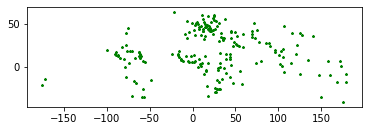

In [193]:
#https://gis.stackexchange.com/questions/241612/change-marker-size-in-plot-with-geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
#type(world)
cities.plot(marker='*', color='green', markersize=5);
#base = copy.plot(marker = 'o', markersize = 100, color = 'pink')

In [194]:
copy.plot?

# Extract Lat and Lon

In [195]:
g_merged["geometry"].centroid.x.values

array([127.02781811, 127.02958484, 127.04061043, 127.04549871,
       127.03608765, 127.02962976, 127.0338966 , 127.0252507 ,
       127.01995905, 127.02420022, 127.02048657, 127.04233516,
       127.04368195, 127.05534959, 127.05814642, 127.06420975,
       127.05757915, 126.95272984, 126.95801578, 126.94914859,
       126.94217267, 126.94142115, 126.94750642, 126.93479638,
       126.92612134, 126.92107063, 126.90912049, 126.89976714,
       126.90025202, 126.92151352, 126.911856  , 126.90191712,
       126.87989888, 126.98045252, 126.98506975, 126.97489727,
       126.96688098, 126.96662317, 126.95247442, 126.96087823,
       126.95843786, 126.96861953, 126.97170597, 126.95419482,
       126.99314564, 126.99205969, 127.00513582, 126.98900887,
       127.00077071])

In [196]:
g_merged['2016 Number of Coffee Shops'].values

array([  9.,  31.,  17.,  59.,  30.,  12.,   5.,   7.,  18.,   7.,  15.,
       182.,  nan,  nan,  nan,   6.,  15.,  23.,  45.,  32.,  41.,  43.,
        16.,  19.,  67., 498.,  65.,  41.,  30.,   0.,  25.,  28., 101.,
        16.,  19.,  43.,  64.,  34.,  10.,  14.,  11.,  93.,  11.,   6.,
        74.,   0.,  64.,   7.,  10.])

In [197]:
g_merged_copy = g_merged.reset_index()

# Bubble Map for 2016

In [ ]:
base = seoul_.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(15,5))

copy.plot(color = 'lightgrey', edgecolor = 'black', ax=base, 
            markersize=g_merged_copy['2016 Number of Coffee Shops'])
case_study.plot(ax = base, facecolor="lime", edgecolor = 'lime', linewidth = 0.5)


i = 0
for lat, lon in zip(g_merged_copy['geometry'].centroid.x.values, g_merged_copy['geometry'].centroid.y.values):
    num = g_merged_copy['2016 Number of Coffee Shops'][i]
    base.scatter([lat], [lon], c='#f075e6', edgecolor=None, alpha=1, s=num)
    i = i + 1

plt.axis('off')

# Bubble Map for 2019

In [203]:
g_merged_copy;

(126.84262314641533, 127.08474112160337, 37.50230626992101, 37.59500606020084)

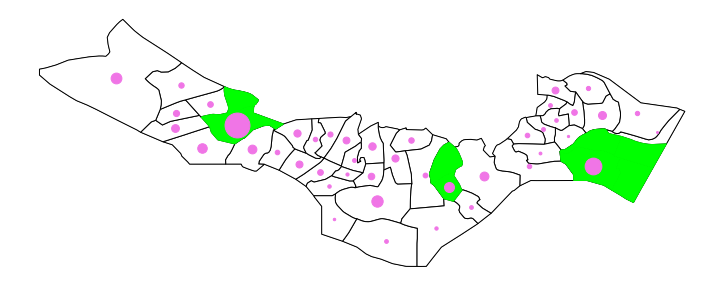

In [204]:
base = seoul_.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(15,5))

copy.plot(color = 'white', edgecolor = 'black', ax=base, 
            markersize=g_merged_copy['2019 Number of Coffee Shops'])
case_study.plot(ax = base, facecolor="lime", edgecolor = 'lime', linewidth = .9)


i = 0
for lat, lon in zip(g_merged_copy['geometry'].centroid.x.values, g_merged_copy['geometry'].centroid.y.values):
    num = g_merged_copy['2019 Number of Coffee Shops'][i]
    base.scatter([lat], [lon], c='#f075e6', edgecolor=None, alpha=1, s=num)
    i = i + 1

plt.axis('off')

# Archived 

### Clean up seoul_data 

In [ ]:
seoul_data = seoul_data.dropna(axis=0, thresh=62).dropna(axis=1, thresh=26)
seoul_data

#### Slice codes

In [ ]:
sk_submuni['muni'] = sk_submuni['code'].str[:5]
sk_muni['prov'] = sk_muni['code'].str[:2]

#### Duplicate as test dfs

In [ ]:
sk_submuni_test = sk_submuni
sk_muni_test = sk_muni
sk_prov_test = sk_province
seoul_data_test = seoul_data

#### Drop columns

In [ ]:
sk_submuni_test = sk_submuni_test.drop(columns=['base_year', 'name'])
sk_muni_test = sk_muni_test.drop(columns=['geometry', 'base_year', 'name'])
sk_prov_test = sk_prov_test.drop(columns=['geometry', 'base_year', 'name'])

#### Merge data using codes

In [ ]:
merged = pd.merge(sk_muni_test, sk_submuni_test, how='right', left_on=['code'], right_on=['muni'])

#### Merge sk_province and clean up df

In [ ]:
merged = pd.merge(sk_prov_test, merged, how='right', left_on=['code'], right_on=['prov'])
merged = merged.rename(columns={'name_eng':'province', 'name_eng_x':'municipalities', 'name_eng_y':'submunicipalities', 
                       'code':'prov_code', 'code_x':'muni_code', 'code_y': 'sub_code'})
                                #'geometry':'geometry_p', 'geometry_x':'geometry_sub', 'geometry_y':'geometry'})
merged = merged.drop(columns=['prov', 'muni'])
merged

#### Merge seoul data

In [ ]:
merged_seoul_data = pd.merge(sk_muni_test, seoul_data_test, left_on=['name_eng'], right_on=['Districts']).dropna()
merged_seoul_data

In [ ]:
seoul = merged[merged['province']=='Seoul'] #filtered merged by Seoul
# Has len 409...?
map_data = pd.merge(seoul, seoul_data_test, left_on=['municipalities'], right_on=['Districts']).drop(columns=['Districts'])
map_data = map_data.rename(columns={'Q2-18 Business Openings': 'Openings'})
map_data
# Has len 504...?
# merged_seoul_data = merged_seoul_data.drop(columns='geometry')
# map_data = pd.merge(seoul, merged_seoul_data, left_on=['municipalities'], right_on=['name_eng'])
# map_data = map_data.rename(columns={'Q2-18 Business Openings': 'Openings'})
# map_data

## Bokeh

In [ ]:
import json
from bokeh.io import show
from bokeh.io import output_notebook
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [ ]:
output_notebook()

### Seoul Business Openings
* Outlines show submunicipalities but hovering shows the name of municipalities
* Spaces missing outlines?
* How to place patches ontop of patches?

In [ ]:
# Input GeoJSON source that contains features for plotting
seoul_source = GeoJSONDataSource(geojson = map_data.to_json())

In [ ]:
# Create figure object.
p = figure(title = 'Map', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
seoul_submuni = p.patches('xs','ys', source = seoul_source,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.1, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [seoul_submuni],
                      tooltips = [('Municipalities','@municipalities'),('Submunicipalities','@submunicipalities'),
                               ('Business Openings', '@Openings')]))
show(p)

### Submunicipalities

In [ ]:
# Input GeoJSON source that contains features for plotting
sk_source = GeoJSONDataSource(geojson = merged.to_json())

In [ ]:
# Create figure object.
p = figure(title = 'Map', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
seoul_submuni = p.patches('xs','ys', source = sk_source,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.1, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [seoul_submuni],
                      tooltips = [('Submunicipalities','@submunicipalities')]))
show(p)